# Looking for SRB including time lenghts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import cm, colors
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Load data


In [2]:
path = '../datasets/preprocessed/'
stim   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
stim.drop(labels=['MotiveExpTimeSecs'], axis=1, inplace=True)
stim.head(3)

,Frame,Time,visible,speed,session_id
index,,,,,
0,0,0.000000,0,0.0,0
1,0,0.000000,0,0.0,0
2,1,0.004167,0,0.0,0


In [3]:
rat = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')
rat.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var
index,,,,,,,,,,,,,
1,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,1,-87.705039,156.977244,NaN
2,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,1,-87.034598,160.892886,NaN
3,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,1,-86.343297,165.938758,NaN


## Preparing dataset

In [4]:
rat_s = pd.merge(rat, stim, on=['Frame', 'session_id', 'Time'])
rat_s.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
0,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,1,-87.705039,156.977244,NaN,0,0.0
1,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,1,-87.034598,160.892886,NaN,0,0.0
2,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,1,-86.343297,165.938758,NaN,0,0.0


In [5]:
mask = (rat_s.visible == True) & (rat_s.Filtered == 1) 
rat_svf = rat_s[mask]
rat_svf.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
3328,4466,18.608335,-0.057434,0.265912,-0.031560,-0.622719,0.779576,-0.017521,0,1,-91.611629,-6.527740,16.027003,1,0.0
3329,4467,18.612501,-0.057289,0.266146,-0.031586,-0.619179,0.782864,-0.017764,0,1,-91.643348,-7.613697,15.448395,1,0.0
3330,4468,18.616668,-0.057137,0.266369,-0.031603,-0.616675,0.785230,-0.018079,0,1,-91.679236,-8.612539,14.876621,1,28.0


## Limits for data detection

In [6]:
## TODO: change values
limits=pd.DataFrame({'speed':[-7 ,  7, -14, 14, -28, 28],
                     'min'  :[-10,  5, -16,  6, -34, 20],
                     'max'  :[-5 , 10,  -6, 16, -20, 34]})
limits

,max,min,speed
0,-5,-10,-7
1,10,5,7
2,-6,-16,-14
3,16,6,14
4,-20,-34,-28
5,34,20,28


## Using old method for testing

### Looking for Stimuli Related Behavior with given limits

In [7]:
rat_svf['Dmin'], rat_svf['Dmax'] = 0, 0
rat_svf['change'] = False
for index, row in limits.iterrows():
    rat_svf['change'] = (rat_svf['Dmin']==0) & (rat_svf['speed']==row['speed'])
    rat_svf['Dmin'] = np.where(rat_svf['change']==True, row['min'], rat_svf['Dmin'])
    rat_svf['Dmax'] = np.where(rat_svf['change']==True, row['max'], rat_svf['Dmax'])

rat_svf.head()

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,Dmin,Dmax,change
3328,4466,18.608335,-0.057434,0.265912,-0.031560,-0.622719,0.779576,-0.017521,0,1,-91.611629,-6.527740,16.027003,1,0.0,0,0,False
3329,4467,18.612501,-0.057289,0.266146,-0.031586,-0.619179,0.782864,-0.017764,0,1,-91.643348,-7.613697,15.448395,1,0.0,0,0,False
3330,4468,18.616668,-0.057137,0.266369,-0.031603,-0.616675,0.785230,-0.018079,0,1,-91.679236,-8.612539,14.876621,1,28.0,20,34,True
3331,4469,18.620835,-0.056988,0.266611,-0.031632,-0.614609,0.787167,-0.018311,0,1,-91.706548,-6.554320,14.310973,1,28.0,20,34,True
3332,4470,18.625001,-0.056847,0.266863,-0.031665,-0.613216,0.788482,-0.018362,0,1,-91.715147,-2.064002,13.917147,1,28.0,20,34,True


In [8]:
rat_svf['SRB'] = (rat_svf['U'] > rat_svf['Dmin']) & (rat_svf['U'] < rat_svf['Dmax'])
rat_svf.head()

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,Dmin,Dmax,change,SRB
3328,4466,18.608335,-0.057434,0.265912,-0.031560,-0.622719,0.779576,-0.017521,0,1,-91.611629,-6.527740,16.027003,1,0.0,0,0,False,False
3329,4467,18.612501,-0.057289,0.266146,-0.031586,-0.619179,0.782864,-0.017764,0,1,-91.643348,-7.613697,15.448395,1,0.0,0,0,False,False
3330,4468,18.616668,-0.057137,0.266369,-0.031603,-0.616675,0.785230,-0.018079,0,1,-91.679236,-8.612539,14.876621,1,28.0,20,34,True,False
3331,4469,18.620835,-0.056988,0.266611,-0.031632,-0.614609,0.787167,-0.018311,0,1,-91.706548,-6.554320,14.310973,1,28.0,20,34,True,False
3332,4470,18.625001,-0.056847,0.266863,-0.031665,-0.613216,0.788482,-0.018362,0,1,-91.715147,-2.064002,13.917147,1,28.0,20,34,True,False


### Visualzation of SRB time

In [9]:
mask_vis = (rat_svf.speed == 7)  & (rat_svf.session_id == 1)
rat_temp = rat_svf[mask_vis] 

rat_temp.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,Dmin,Dmax,change,SRB
128320,2409,10.037501,0.083276,0.107363,-0.019257,0.997870,-0.026620,0.048594,1,1,87.212026,-2.091632,3.235544,1,7.0,5,10,False,False
128321,2410,10.041667,0.083232,0.107353,-0.019269,0.997830,-0.028853,0.048768,1,1,87.201977,-2.412078,3.239809,1,7.0,5,10,False,False
128322,2411,10.045834,0.083188,0.107344,-0.019282,0.997787,-0.031078,0.048963,1,1,87.190651,-2.718008,3.195147,1,7.0,5,10,False,False
128323,2412,10.050001,0.083145,0.107335,-0.019295,0.997742,-0.033201,0.049167,1,1,87.178847,-2.832818,3.139401,1,7.0,5,10,False,False
128324,2413,10.054167,0.083103,0.107327,-0.019309,0.997695,-0.035324,0.049390,1,1,87.165927,-3.101187,3.076294,1,7.0,5,10,False,False


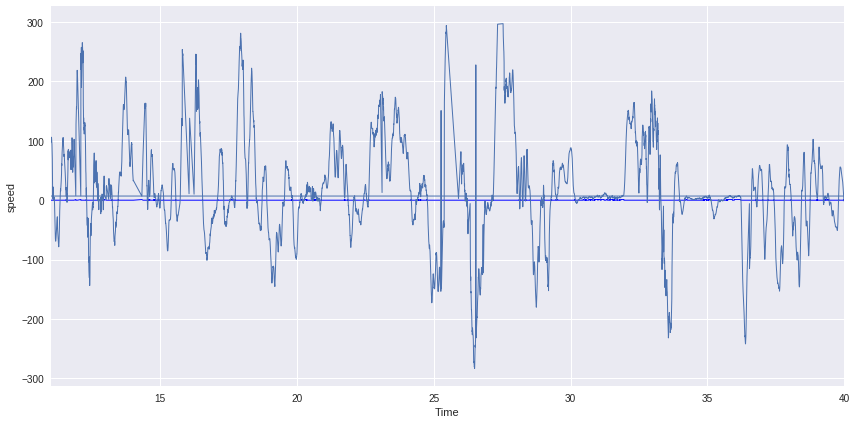

In [10]:
# g = sns.FacetGrid(data=rat_SRB7[rat_SRB7['session_id' == 1]], size=6, aspect=2)
g = sns.FacetGrid(data=rat_temp, size=6, aspect=2, xlim=[11,40])
g.map(plt.plot, "Time", "SRB" , alpha=1, linewidth=1, color='blue');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed"     , alpha=1, linewidth=1);


### Removing Not needed columns

In [11]:
rat_svfd = rat_svf.drop(['Filtered', 'visible', 'change'], axis=1)
rat_svfd.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Theta,U,U_var,speed,Dmin,Dmax,SRB
3328,4466,18.608335,-0.057434,0.265912,-0.031560,-0.622719,0.779576,-0.017521,0,-91.611629,-6.527740,16.027003,0.0,0,0,False
3329,4467,18.612501,-0.057289,0.266146,-0.031586,-0.619179,0.782864,-0.017764,0,-91.643348,-7.613697,15.448395,0.0,0,0,False
3330,4468,18.616668,-0.057137,0.266369,-0.031603,-0.616675,0.785230,-0.018079,0,-91.679236,-8.612539,14.876621,28.0,20,34,False


###  Merging close events & Deleting short SRB

In [12]:
# MERGING SRB THAT HAVE REALLY SHORT BREAKS
rat_up2 = pd.DataFrame()
for name, dd in rat_svfd.groupby('session_id'):   
    # calculating dtime - time difference between srb    
    dfSRBtemp = dd[dd['SRB']==True]
    dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)
    df2 = pd.merge(dd, dfSRBtemp[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
    df2.fillna(0, inplace=True)
    
    #special time cases
    dftemp = dfSRBtemp[(dfSRBtemp['dtime']>0.005) & (dfSRBtemp['dtime']<0.1)]
    dftemp = dftemp.reset_index(drop=True)

    maxF, minF = {}, {}
    minF={}
    df2['SRBall'] = df2['SRB']     
    df2['SRBtt'] = False
    # merge super close events
    for i in np.arange(0,len(dftemp)):
        maxF[i] = dftemp.Time[i]
        minF[i] = maxF[i]-dftemp.dtime[i]
    
        df2['SRBtt'] = (df2['Time']>minF[i]) & (df2['Time']<maxF[i]) | (df2['SRBtt']==True)
        df2['SRBall'] = (df2['SRBtt']==True) | (df2['SRBall']==True)
        
        
    df2['dtimeA'] = df2['dtime']
    df2.drop('dtime', inplace=True, axis=1)

    # DELETING SHORT SRB
    # calculating dtime - time of srb    
    dfSRBtemp2 = df2[df2['SRBall']==False]
    dfSRBtemp2['dtime'] = dfSRBtemp2['Time'].diff(1)
    df22 = pd.merge(df2, dfSRBtemp2[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
    df22.fillna(0, inplace=True)
    
    #special time cases
    dftemp2 = dfSRBtemp2[(dfSRBtemp2['dtime']<0.3) & (dfSRBtemp2['dtime']>0.0049)]
    dftemp2 = dftemp2.reset_index(drop=True)    
    maxF2, minF2 = {}, {}
    df22['SRBall2'] = df22['SRBall']     
    df22['SRBtt2'] = False
    
    # delete short events
    for i in np.arange(0,len(dftemp2)):
        maxF2[i] = dftemp2.Time[i]
        minF2[i] = dftemp2.Time[i] - dftemp2.dtime[i]
        df22['SRBtt2'] = ((df22['Time']>=minF2[i]) & (df22['Time']<=maxF2[i])) | (df22['SRBtt2']==True)
        df22['SRBall2'] = (df22['SRBtt2']==False) & (df22['SRBall2'] == True)
        
    rat_up2 = pd.concat([rat_up2, df22], axis=0, ignore_index=True)    

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Vistualiztion of SRB Results

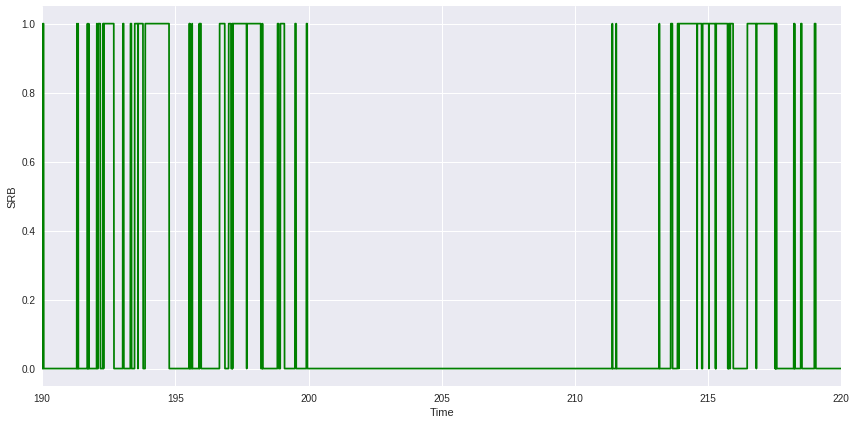

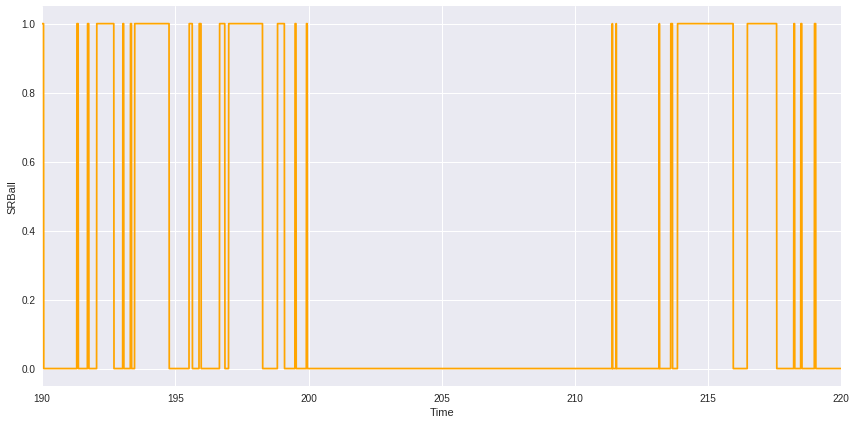

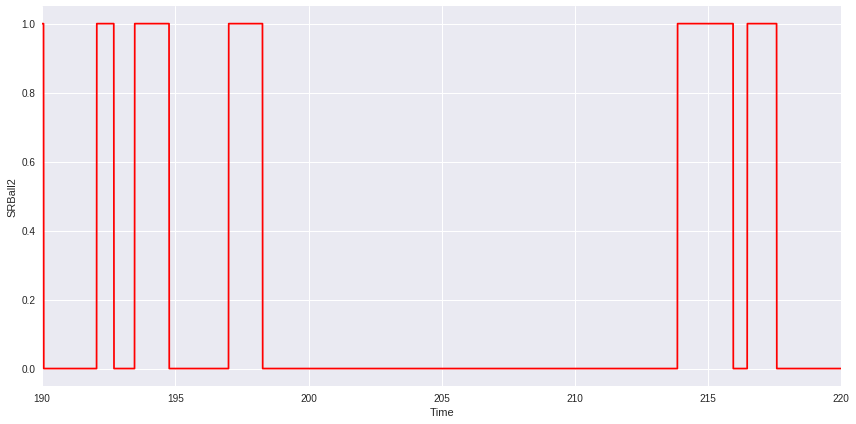

In [13]:
temp = rat_up2[rat_up2['session_id']==1]
g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[190, 220])
g.map(plt.plot, 'Time', 'SRB', color='g')

g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[190, 220])
g.map(plt.plot, 'Time', 'SRBall', color='orange')

g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[190, 220])

g.map(plt.plot, 'Time', 'SRBall2', color='r')


## Plotting results with outcome

In [14]:
temp['SRBall2'] = temp['SRBall2'] * 10

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


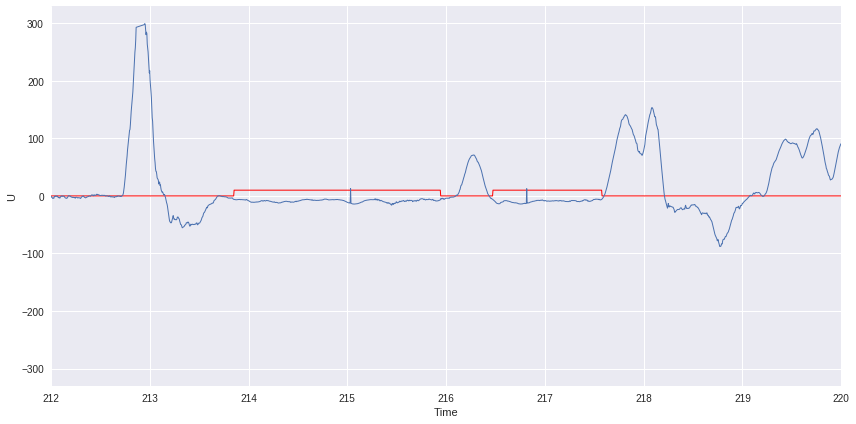

In [15]:
g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[212, 220])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);

## Velocities other then 0

In [16]:
mask2 = (rat_up2.session_id == 7) & (rat_up2.speed == 7)
temp2 = rat_up2[mask2]
temp2.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Theta,...,speed,Dmin,Dmax,SRB,SRBall,SRBtt,dtimeA,dtime,SRBall2,SRBtt2
805223,23721,98.837506,-0.051419,0.054896,-0.077335,-0.302056,-0.767568,-0.560176,7,-151.665742,...,7.0,5,10,False,False,False,0.0,0.004166,False,False
805224,23722,98.841673,-0.051473,0.055002,-0.077447,-0.305136,-0.764270,-0.562866,7,-151.537354,...,7.0,5,10,False,False,False,0.0,0.004167,False,False
805225,23723,98.845840,-0.051527,0.055111,-0.077555,-0.308070,-0.761001,-0.565554,7,-151.421885,...,7.0,5,10,False,False,False,0.0,0.004167,False,False
805226,23724,98.850006,-0.051581,0.055224,-0.077660,-0.310837,-0.757747,-0.568267,7,-151.321732,...,7.0,5,10,False,False,False,0.0,0.004166,False,False
805227,23725,98.854173,-0.051634,0.055342,-0.077764,-0.313417,-0.754498,-0.571051,7,-151.240177,...,7.0,5,10,False,False,False,0.0,0.004167,False,False


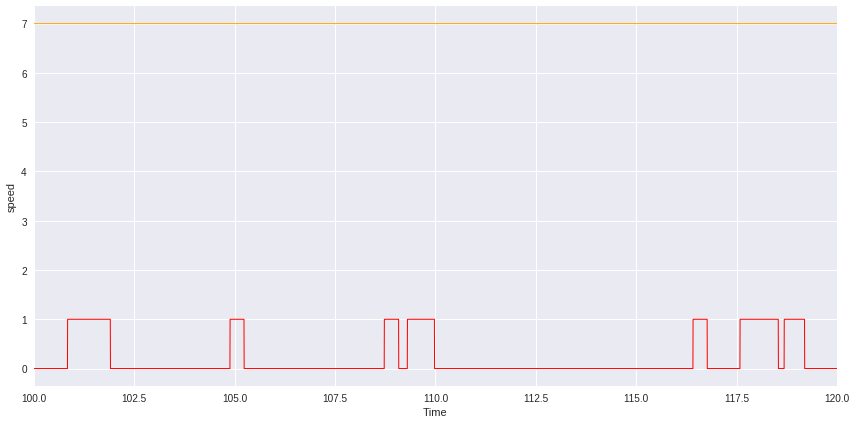

In [17]:
g = sns.FacetGrid(data=temp2, size=6, aspect=2, xlim=[100, 120])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='orange');



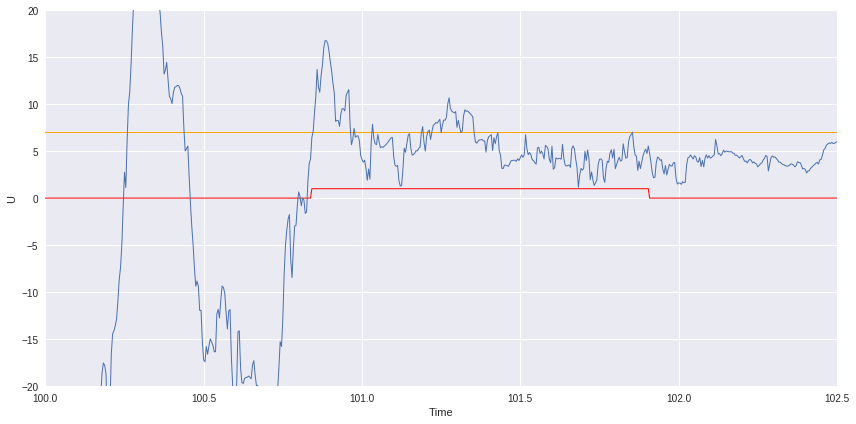

In [18]:
g = sns.FacetGrid(data=temp2, size=6, aspect=2, xlim=[100, 102.5], ylim=[-20, 20])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "U" , alpha=1, linewidth=1);

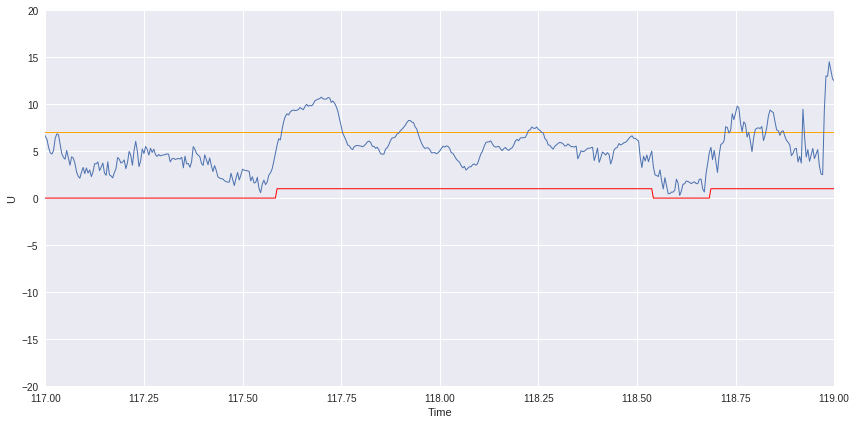

In [19]:
g = sns.FacetGrid(data=temp2, size=6, aspect=2, xlim=[117, 119], ylim=[-20, 20])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='orange');
g.map(plt.plot, "Time", "U" , alpha=1, linewidth=1);

# Comparing with SRB collected from videos 

In [22]:
df = rat_up2.copy()
df.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Theta,...,speed,Dmin,Dmax,SRB,SRBall,SRBtt,dtimeA,dtime,SRBall2,SRBtt2
0,4466,18.608335,-0.057434,0.265912,-0.031560,-0.622719,0.779576,-0.017521,0,-91.611629,...,0.0,0,0,False,False,False,0.0,0.000000,False,False
1,4467,18.612501,-0.057289,0.266146,-0.031586,-0.619179,0.782864,-0.017764,0,-91.643348,...,0.0,0,0,False,False,False,0.0,0.004166,False,False
2,4468,18.616668,-0.057137,0.266369,-0.031603,-0.616675,0.785230,-0.018079,0,-91.679236,...,28.0,20,34,False,False,False,0.0,0.004167,False,False


## Experiment 2

In [23]:
dfSRB2 = pd.DataFrame()
dd2 = df[df['session_id']==2]
dd2.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Theta,...,speed,Dmin,Dmax,SRB,SRBall,SRBtt,dtimeA,dtime,SRBall2,SRBtt2
202438,4578,19.075001,-0.024109,0.058175,0.006781,-0.170319,-0.973893,-0.142161,2,-129.850858,...,0.0,0,0,False,False,False,0.0,0.000000,False,False
202439,4579,19.079168,-0.023938,0.058188,0.006465,-0.168941,-0.973989,-0.144794,2,-130.598952,...,0.0,0,0,False,False,False,0.0,0.004167,False,False
202440,4580,19.083335,-0.023780,0.058189,0.006164,-0.167979,-0.974014,-0.147029,2,-131.195235,...,0.0,0,0,False,False,False,0.0,0.004167,False,False


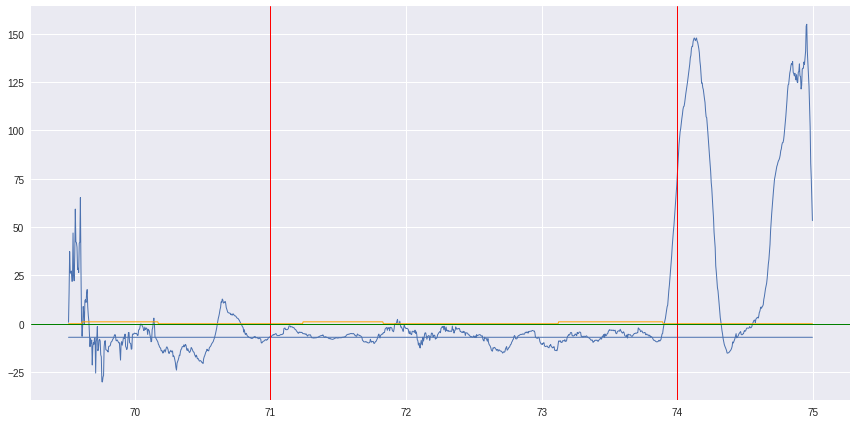

In [28]:
#  71, 73
dpart = dd2[(dd2['Time']>69.5) & (dd2['Time']<75)]
xmin, xmax = 71, 74

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);

g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='orange');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


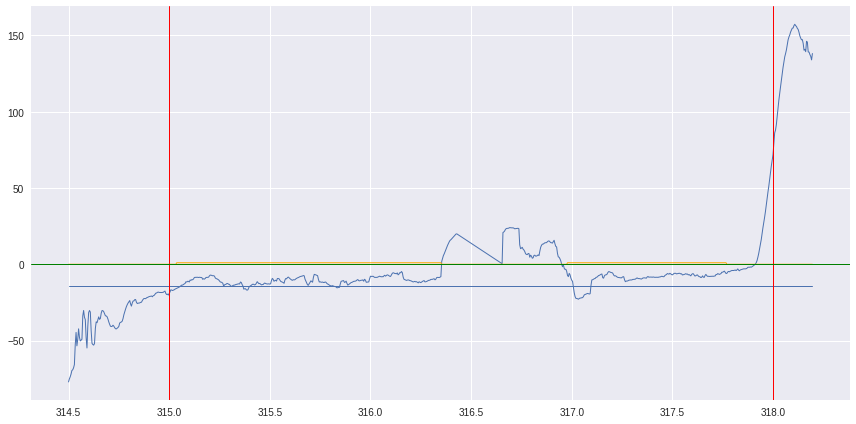

In [32]:
## 315, 317
dpart = dd2[(dd2['Time']>314.5) & (dd2['Time']<318.2)]
xmin, xmax = 315, 318

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='orange');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


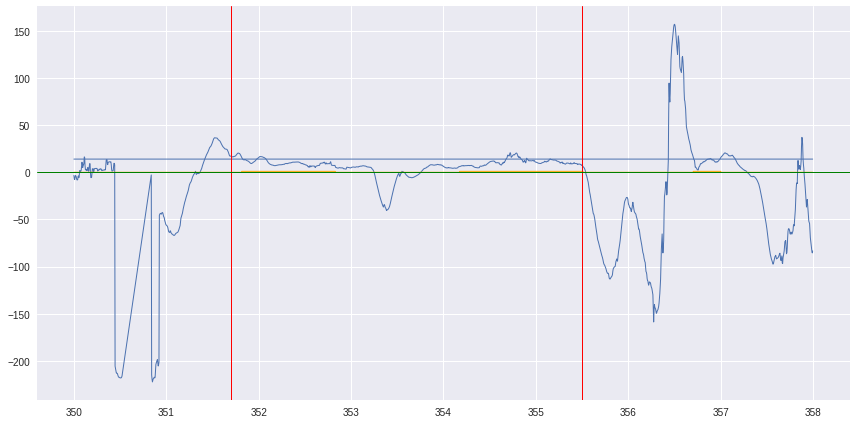

In [33]:
## 351, 356
dpart = dd2[(dd2['Time']>351.8) & (dd2['Time']<358)]
xmin, xmax = 351.7, 355.5

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='orange');

g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');